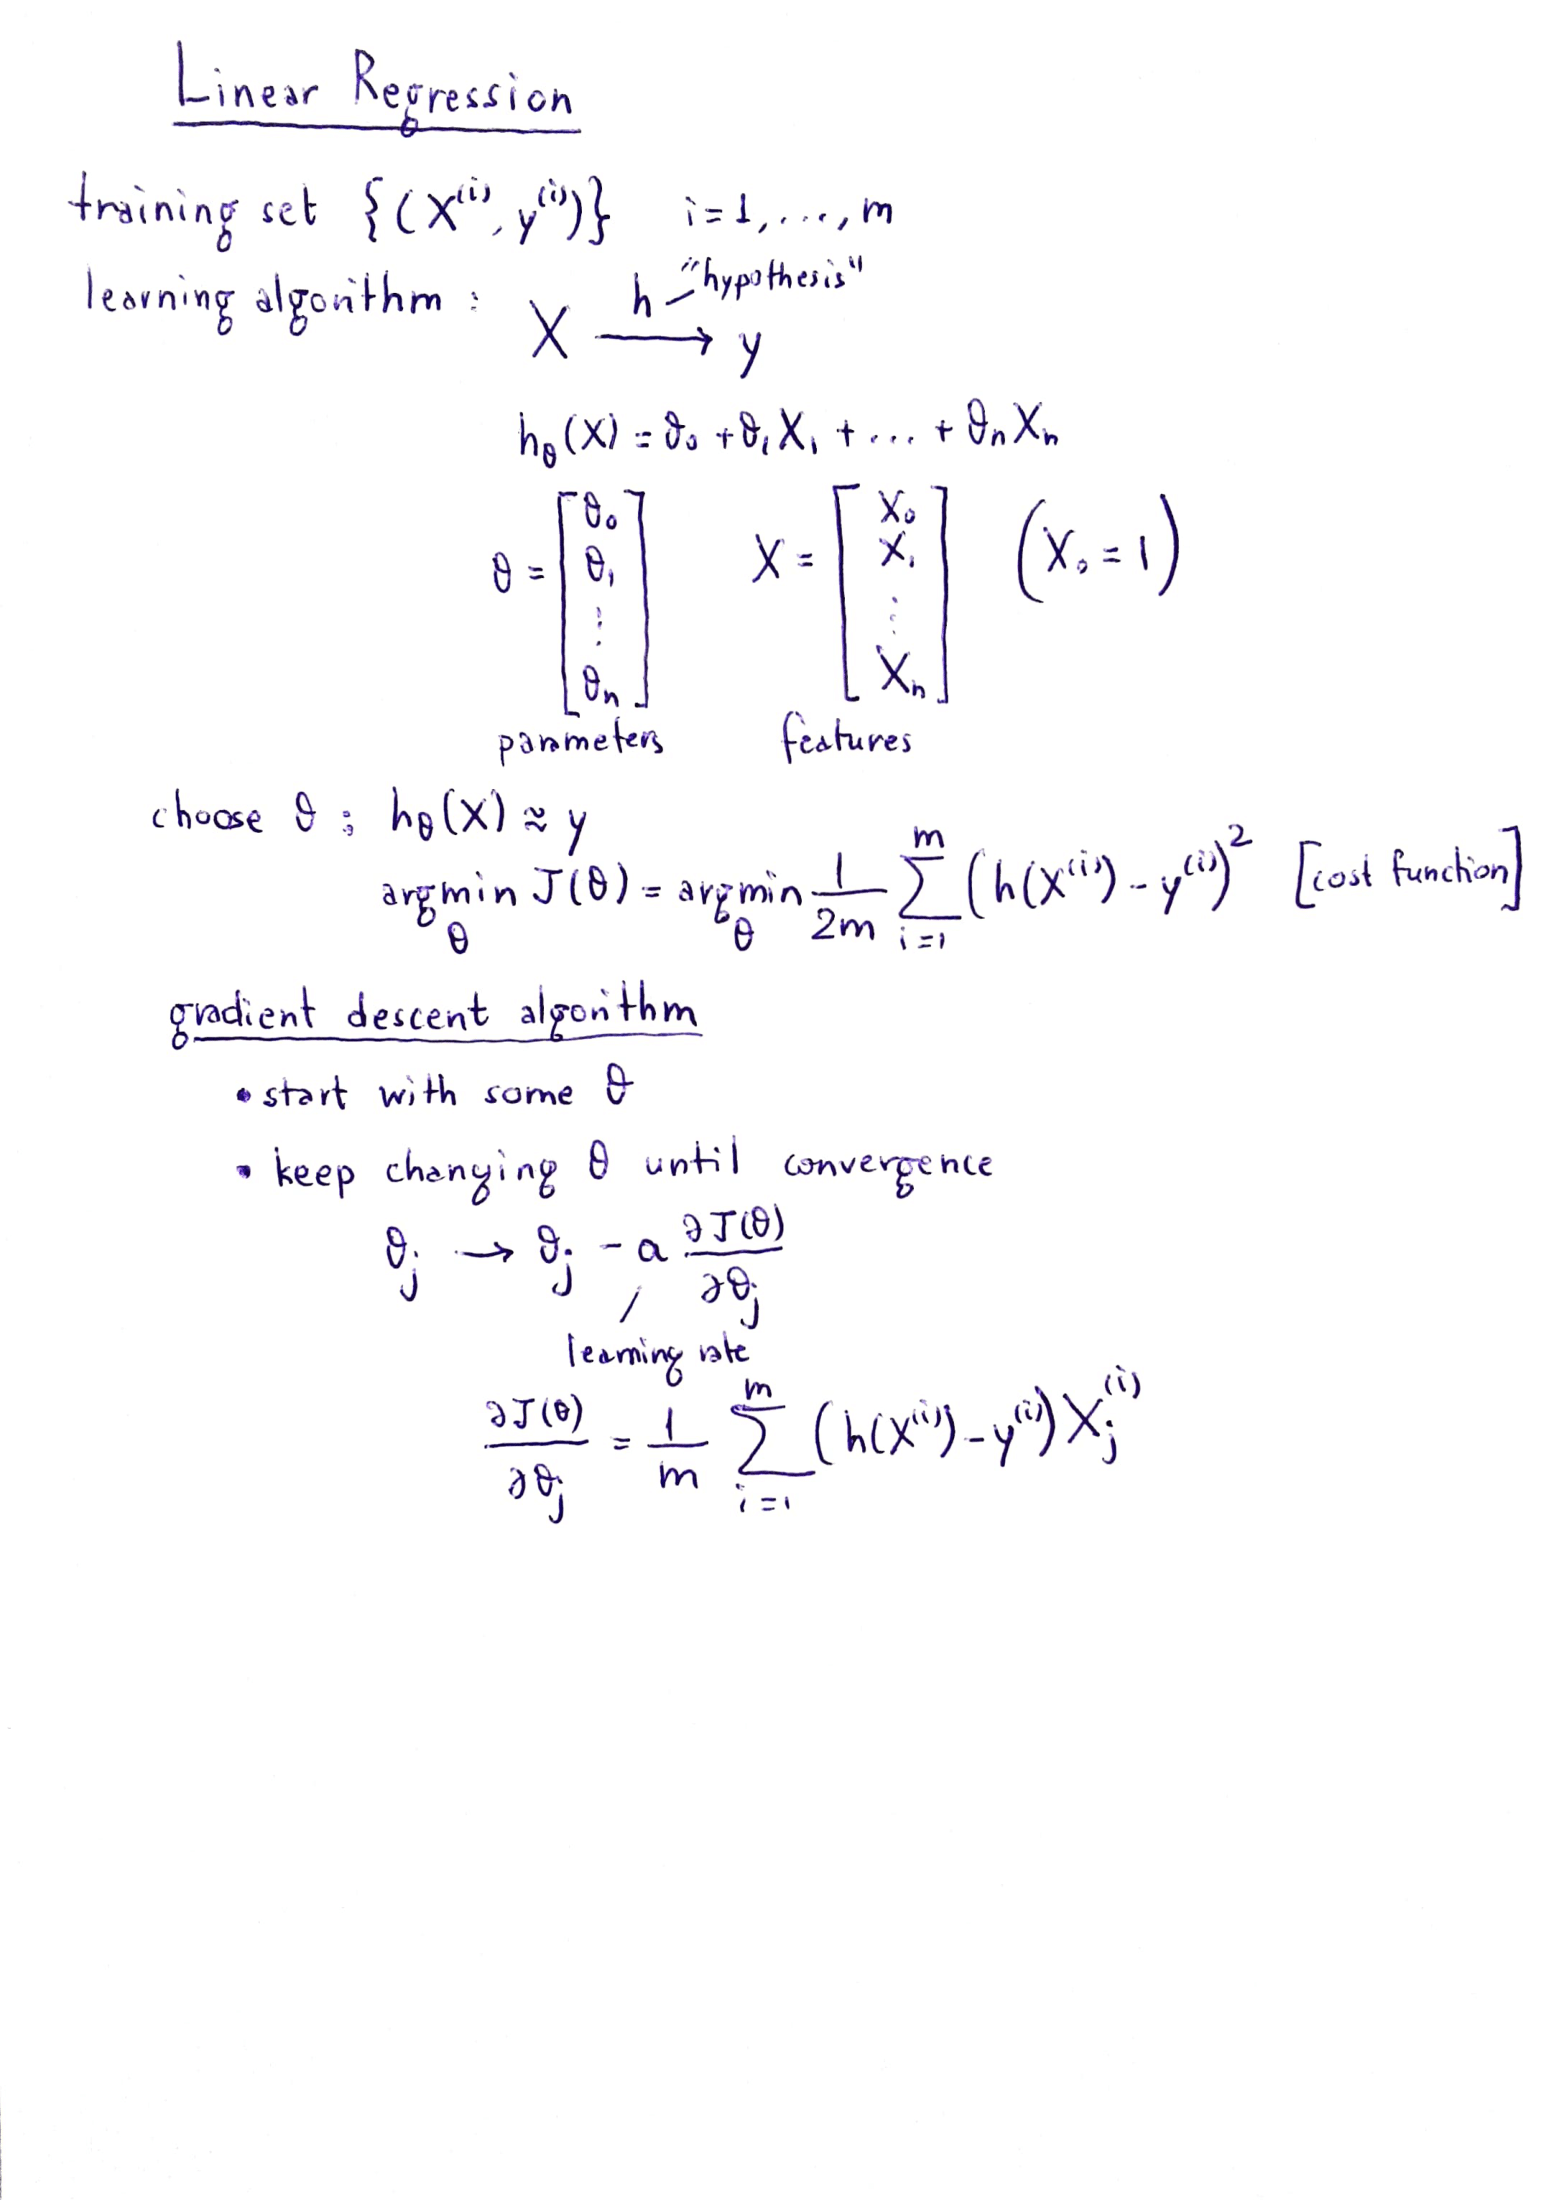

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(0)
# np.random.rand(d0,d1,..) - create an array of given shape and populate it with random samples
#                            from a uniform distribution over [0,1)
X = 5*np.random.rand(100,1)
# np.random.randn(d0,d1,..) - return a sample from the standard normal distribution 
#     d0,d1 - dimensions of the returned array
y = 2 + 3*X + np.random.randn(100,1)
X.shape, y.shape

((100, 1), (100, 1))

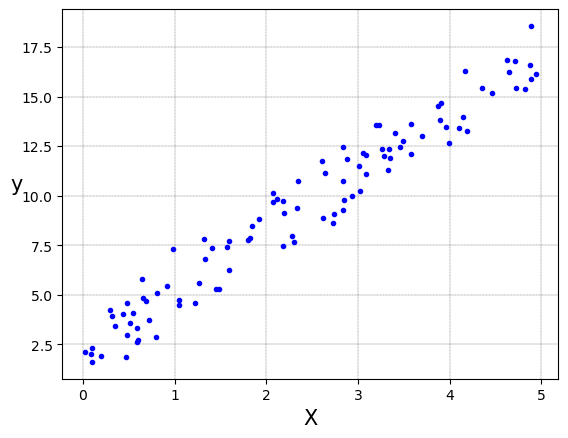

In [4]:
# 'b.' - format string
# 'b' - points are blue; '.' - marker is dot
plt.plot(X, y, 'b.')
plt.xlabel('X', fontsize=15)
plt.ylabel('y', fontsize=15, rotation=0)
plt.grid(color='k', linestyle='--', linewidth=0.2)

In [5]:
# X0 = 1
# np.ones(shape) - return a new array of given shape filled with ones
add_ones = np.ones((len(X),1))
# np.hstack(tuple) - stack array in sequence horizontally 
X_data = np.hstack((add_ones, X))
X_data[:2], X_data.shape

(array([[1.        , 2.74406752],
        [1.        , 3.57594683]]),
 (100, 2))

In [14]:
def GradientDescent(X, y, theta, lr=0.01, n_iters=1000):
    m = len(y)
    costs = []
    for _ in range(n_iters):
        y_hat = np.dot(X, theta)
        theta = theta - (1/m)*lr* np.dot(X.T, (y_hat-y))
        cost = (1/2/m)*np.sum(np.square(y_hat-y))
        costs.append(cost)
    return theta, costs

In [15]:
class LinearRegression:
    
    def __init__(self, lr=0.01, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.cost = np.zeros(self.n_iters)
        
    def train(self, X, y):
        self.theta = np.random.randn(X.shape[1], 1)
        thetas, costs = GradientDescent(X, y, self.theta, self.lr, self.n_iters)
        self.theta = thetas
        self.cost = costs
        return self
    
    def predict(self, X):
        return np.dot(X, self.theta)

In [19]:
model = LinearRegression(lr=0.01, n_iters=1000)
model.train(X_data, y)
model.theta

array([[2.03026605],
       [3.04852464]])

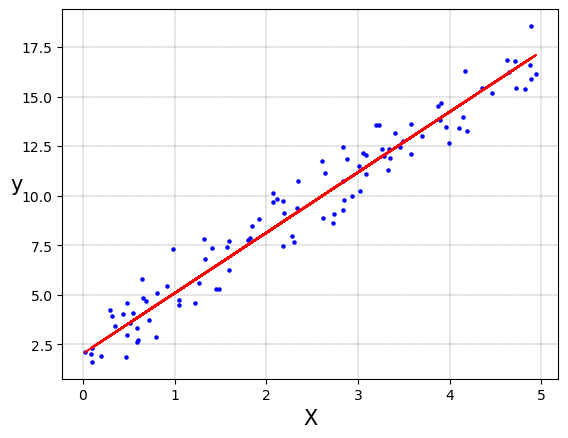

In [22]:
y_pred = model.predict(X_data)
plt.scatter(X, y, s=5, color='b')
plt.xlabel('X', fontsize=15)
plt.ylabel('y', fontsize=15, rotation=0)
plt.plot(X, y_pred, color='r')
plt.grid(color='k', linestyle='--', linewidth=0.2)